In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.preprocess import *
from utils.model import *

In [2]:
train_data = read_data('train')
X_train = preprocess_data(train_data)
test_data = read_data('test')
X_test = preprocess_data(test_data)

In [4]:
X_train

,NPLV,VES,T,SI,MN,S,P,CR,NI,CU,...,O2_pressure,VDL,VES_lom,plavka_STFUT,plavka_ST_FURM,plavka_ST_GOL,RAS,POL,VDSYP,VSSYP
0,510008,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,...,13.192532,8.333333,25400.000000,971.0,11.0,11.0,833.024315,1.145962,365.250000,1747.500000
1,510009,264500.0,1419.0,0.68,0.20,0.017,0.087,0.02,0.01,0.03,...,14.493228,8.333333,26200.000000,972.0,12.0,12.0,832.179153,1.346743,351.266667,1585.333333
2,510010,263800.0,1384.0,0.56,0.26,0.017,0.096,0.03,0.01,0.03,...,13.758478,12.000000,19075.000000,973.0,13.0,13.0,821.524510,1.262255,345.153846,1851.538462
3,510011,264000.0,1401.0,0.48,0.27,0.018,0.091,0.03,0.01,0.02,...,13.875079,8.333333,28033.333333,974.0,14.0,14.0,805.565217,1.442741,342.538462,2100.000000
4,510012,263300.0,1422.0,0.47,0.23,0.018,0.096,0.02,0.01,0.03,...,13.665570,8.333333,25366.666667,975.0,15.0,15.0,813.665590,1.141244,347.812500,1783.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,512318,267200.0,1415.0,0.38,0.28,0.019,0.099,0.02,0.01,0.02,...,13.993048,19.200000,14720.000000,3281.0,22.0,56.0,853.589454,1.487194,412.533333,1168.666667
2059,512319,266800.0,1405.0,0.50,0.30,0.017,0.104,0.02,0.01,0.02,...,13.820539,12.000000,19150.000000,3282.0,23.0,57.0,851.745487,1.286227,406.133333,1532.666667
2060,512320,276100.0,1398.0,0.61,0.31,0.025,0.115,0.03,0.01,0.03,...,14.512507,21.666667,21400.000000,3283.0,24.0,58.0,836.458333,1.445606,406.133333,1575.333333
2061,512321,275800.0,1408.0,0.38,0.27,0.021,0.100,0.02,0.01,0.03,...,15.309762,8.333333,22066.666667,3284.0,25.0,59.0,808.969178,1.533904,405.454545,1720.909091


In [4]:
train_data['chronom'].head()

,NPLV,TYPE_OPER,NOP,VR_NACH,VR_KON,O2
0,510008,межпл.прост.,межпл. простой,2011-01-01 10:28:13,2011-01-01 10:32:15,NaN
1,510008,межпл.прост.,межпл. простой,2021-01-01 03:01:07,2021-01-01 03:08:11,NaN
2,510008,межпл.прост.,Осмотр конвертера,2021-01-01 03:01:19,2021-01-01 03:03:43,NaN
3,510008,межпл.прост.,Наведение гарнисажа,2021-01-01 03:03:43,2021-01-01 03:05:23,NaN
4,510008,межпл.прост.,Слив шлака,2021-01-01 03:05:23,2021-01-01 03:06:09,NaN


In [5]:
train_data['gas'].head()

,NPLV,Time,V,T,O2,N2,H2,CO2,CO,AR,T фурмы 1,T фурмы 2,O2_pressure
0,510008,2021-01-01 03:08:11.437,218263.343750,262.847229,18.722993,80.132247,0.087755,0.163878,0.009229,0.893243,0.0,0.0,13.085938
1,510008,2021-01-01 03:08:12.437,218263.343750,262.847229,18.732721,80.138406,0.087959,0.148980,0.008390,0.892948,0.0,0.0,13.085938
2,510008,2021-01-01 03:08:13.437,218369.359375,262.152771,18.742449,80.144565,0.088163,0.134082,0.007551,0.892653,0.0,0.0,13.085938
3,510008,2021-01-01 03:08:14.437,218475.359375,261.805573,18.752177,80.150724,0.088367,0.119184,0.006712,0.892358,0.0,0.0,13.093172
4,510008,2021-01-01 03:08:15.437,218369.359375,260.763885,18.761905,80.156883,0.088571,0.104286,0.005873,0.892063,0.0,0.0,13.093172


In [6]:
train_data['lom'].head()

,NPLV,VDL,NML,VES
0,510008,4,К,56500
1,510008,8,О,16700
2,510008,13,КП,3000
3,510009,4,К,49800
4,510009,8,О,22800


In [7]:
train_data['plavki'].head()

,NPLV,plavka_VR_NACH,plavka_VR_KON,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL
0,510008,2021-01-01 03:08:11,2021-01-01 03:51:10,С255,МНЛЗ,971,цилиндрическая,11,5 сопловая,11
1,510009,2021-01-01 04:00:44,2021-01-01 05:07:28,С255,МНЛЗ,972,цилиндрическая,12,5 сопловая,12
2,510010,2021-01-01 05:12:29,2021-01-01 06:00:53,Ст3пс/Э,Изл,973,цилиндрическая,13,5 сопловая,13
3,510011,2021-01-01 06:13:48,2021-01-01 07:08:39,Св-08А.z02,Изл,974,цилиндрическая,14,5 сопловая,14
4,510012,2021-01-01 07:13:44,2021-01-01 08:01:59,SC2M/ЭТ,МНЛС,975,цилиндрическая,15,5 сопловая,15


In [8]:
train_data['produv'].head()

,NPLV,SEC,RAS,POL
0,510008,2021-01-01 03:18:26,382.0,3.92
1,510008,2021-01-01 03:18:28,382.0,3.92
2,510008,2021-01-01 03:18:30,553.0,3.92
3,510008,2021-01-01 03:18:32,701.0,3.92
4,510008,2021-01-01 03:18:34,813.0,3.92


In [9]:
train_data['sip'].head()

,NPLV,VDSYP,NMSYP,VSSYP,DAT_OTD
0,510008,346,Уголь ТО,570,2021-01-01 03:03:53
1,510008,346,Уголь ТО,220,2021-01-01 03:04:10
2,510008,408,изв_ЦОИ,7300,2021-01-01 03:08:17
3,510008,346,Уголь ТО,270,2021-01-01 03:09:03
4,510008,346,Уголь ТО,430,2021-01-01 03:09:20


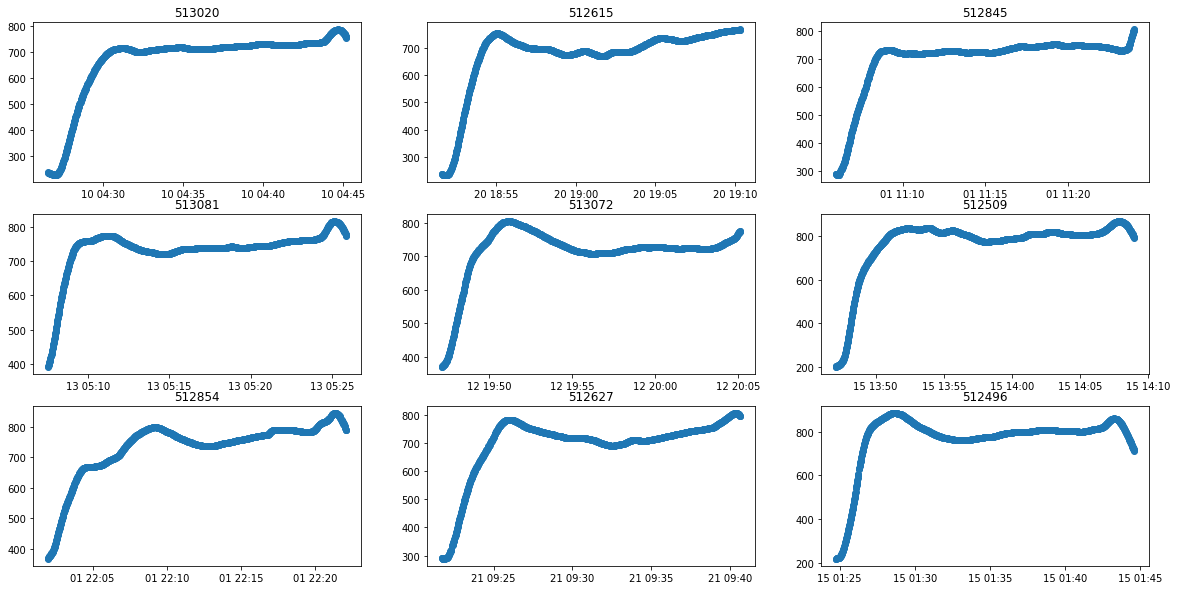

In [8]:
from random import choice
def rand_ts_plot(df, y_col):
    for i in range(1,10):
        NPLV = choice(df.NPLV.unique())
        plt.subplot(3,3,i)
        plt.scatter(x = df[df['NPLV'] == NPLV].index, y = df[df['NPLV'] == NPLV][y_col])
        plt.title(NPLV)

plt.figure(figsize = (20,10))
rand_ts_plot(test_data['reduced_gas'], 'T')